# **`Data Analysis`**

In [74]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 30)

In [75]:
df=pd.read_csv(r'H:\Capstone2\data\processed\Clean NYC TLC.csv')
df.head(3)

,VendorID,pickup_datetime,dropoff_datetime,pickup_day,pickup_hour,Ket_Waktu,Durasi_perjalanan,time_in_seconds,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,payment_type,total_amount,trip_type,congestion_surcharge,PUBorough,PUZone,PUservice_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,minggu,0,Tengah Malam,0 days 00:11:01,661,1,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,1.0,24.18,1.0,2.75,Manhattan,Morningside Heights,Boro Zone
1,2,2023-01-01 00:01:31,2023-01-01 00:16:02,minggu,0,Tengah Malam,0 days 00:14:31,871,1,166,244,1.0,2.48,16.3,1.0,0.5,3.76,0.0,1.0,1.0,22.56,1.0,0.00,Manhattan,Morningside Heights,Boro Zone
2,2,2023-01-01 00:53:09,2023-01-01 01:13:35,minggu,0,Tengah Malam,0 days 00:20:26,1226,1,166,250,5.0,9.01,37.3,1.0,0.5,0.00,0.0,1.0,2.0,39.80,1.0,0.00,Manhattan,Morningside Heights,Boro Zone


In [78]:
df["pickup_datetime"] = df["pickup_datetime"].astype('datetime64[s]')
df["dropoff_datetime"] = df["dropoff_datetime"].astype('datetime64[s]')
df["Durasi_perjalanan"] = df["Durasi_perjalanan"].astype('timedelta64[s]')
df["time_in_seconds"] = df["time_in_seconds"].astype('int64')
df["pickup_hour"] = df["pickup_hour"].astype('int64')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67281 entries, 0 to 67280
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               67281 non-null  int64         
 1   pickup_datetime        67281 non-null  datetime64[s] 
 2   dropoff_datetime       67281 non-null  datetime64[s] 
 3   pickup_day             67281 non-null  object        
 4   pickup_hour            67281 non-null  int64         
 5   Ket_Waktu              67281 non-null  object        
 6   Durasi_perjalanan      67281 non-null  timedelta64[s]
 7   time_in_seconds        67281 non-null  int64         
 8   RatecodeID             67281 non-null  int64         
 9   PULocationID           67281 non-null  int64         
 10  DOLocationID           67281 non-null  int64         
 11  passenger_count        67281 non-null  float64       
 12  trip_distance          67281 non-null  float64       
 13  f

#### Analysis

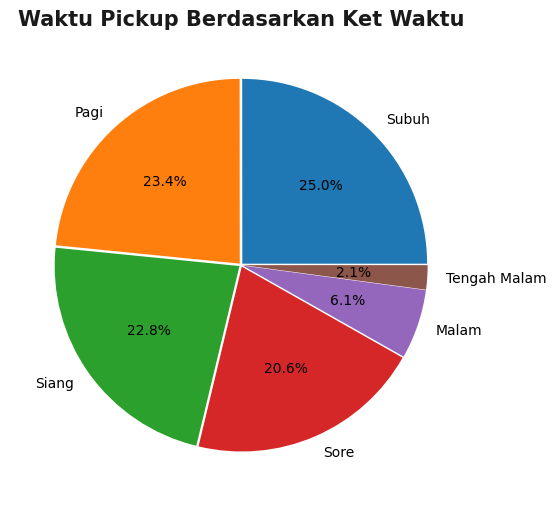

In [80]:
plt.figure(figsize=(6,6))

plt.pie(
    x= df.Ket_Waktu.value_counts(),  # isi dengan kolom numerical
    labels= ('Subuh','Pagi','Siang','Sore','Malam','Tengah Malam'),  # isi dengan kolom categorical
    autopct='%1.1f%%',                    # label percentage
    explode= (0.01, 0.01, 0.01, 0.01, 0.01, 0.01)
)

plt.title(
            "Waktu Pickup Berdasarkan Ket Waktu",
            color="#1a1a1a",
            fontsize=15,
            weight="bold"
        )

plt.show()

Text(0.5, 1.0, 'total amount for trips in every hour')

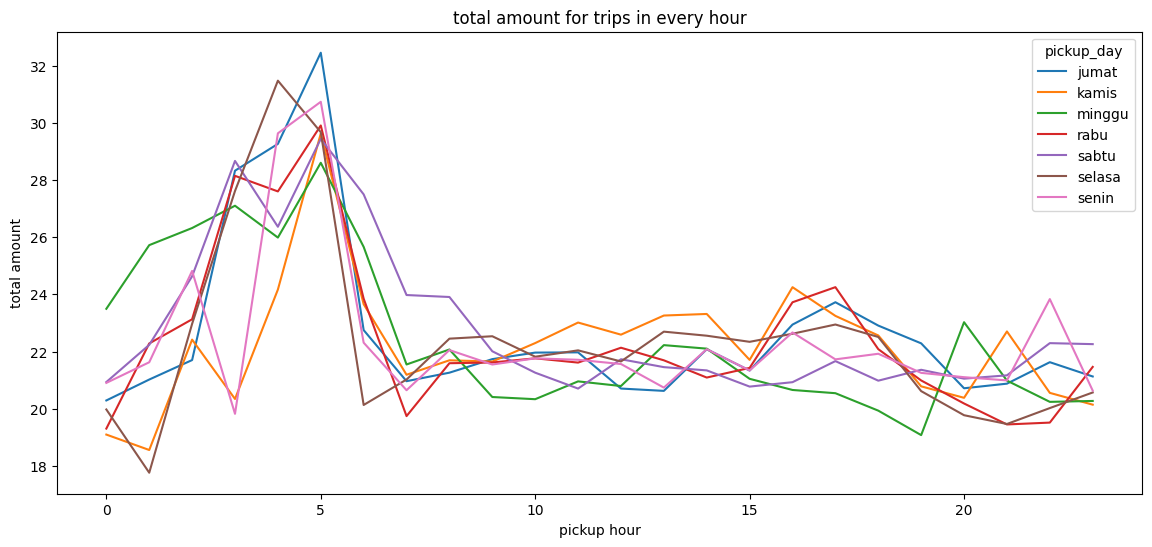

In [81]:
df.pivot_table('total_amount', index='pickup_hour', columns='pickup_day').plot(figsize=(14,6))
plt.xlabel('pickup hour');
plt.ylabel('total amount');
plt.title('total amount for trips in every hour') 


##### Insight
-

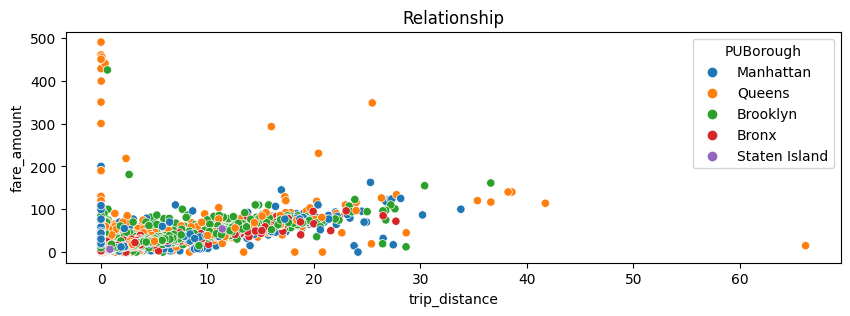

In [83]:
plt.figure(figsize=(10,3))

sns.scatterplot(data=df, x='trip_distance', y='fare_amount', hue = 'PUBorough')

plt.title('Relationship')

plt.show()

In [82]:
df.groupby(['Ket_Waktu', 'PUBorough']).size()

Ket_Waktu     PUBorough    
Malam         Bronx              208
              Brooklyn          2718
              Manhattan         8527
              Queens            5373
              Staten Island        1
Pagi          Bronx              281
              Brooklyn          1257
              Manhattan        10136
              Queens            2157
              Staten Island        2
Siang         Bronx              373
              Brooklyn          1976
              Manhattan         9942
              Queens            3454
              Staten Island        3
Sore          Bronx              189
              Brooklyn          1940
              Manhattan         9078
              Queens            4149
              Staten Island        4
Subuh         Bronx               52
              Brooklyn           333
              Manhattan          302
              Queens             742
              Staten Island        2
Tengah Malam  Bronx               89
          